<a href="https://colab.research.google.com/github/arzss-code/jobsheet-machine-learning/blob/main/Association_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Association Learning
Atsiila Arya Nabiih - 4.33.23.1.04 - TI-2B

Notebook ini menggunakan algoritma Apriori dan Eclat untuk menemukan asosiasi antara item yang sering dibeli bersama.

## Apriori



In [ ]:
!pip install apyori


### 1. Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

# Mengubah data ke dalam format list of lists
transactions = []
for i in range(0, len(dataset)):
    basket = [str(dataset.values[i, j]) for j in range(0, 20) if str(dataset.values[i, j]) != 'nan']
    transactions.append(basket)

# Menampilkan 5 transaksi pertama
transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

### 2. Melatih Model Apriori

In [ ]:
from apyori import apriori

# Melatih model apriori
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)

# Konversi hasil menjadi list
results = list(rules)

# Tampilkan 5 aturan pertama
for rule in results[:5]:
    items = [x for x in rule.items]
    print(f"Rule: {items}")
    print(f"Support: {rule.support}")
    for o in rule.ordered_statistics:
        print(f"Confidence: {o.confidence}, Lift: {o.lift}")
    print("="*30)

Rule: ['chicken', 'light cream']
Support: 0.004532728969470737
Confidence: 0.29059829059829057, Lift: 4.84395061728395
Rule: ['mushroom cream sauce', 'escalope']
Support: 0.005732568990801226
Confidence: 0.3006993006993007, Lift: 3.790832696715049
Rule: ['pasta', 'escalope']
Support: 0.005865884548726837
Confidence: 0.3728813559322034, Lift: 4.700811850163794
Rule: ['honey', 'fromage blanc']
Support: 0.003332888948140248
Confidence: 0.2450980392156863, Lift: 5.164270764485569
Rule: ['herb & pepper', 'ground beef']
Support: 0.015997866951073192
Confidence: 0.3234501347708895, Lift: 3.2919938411349285


### 3. Visualisasi Hasil Apriori

<ipython-input-6-87fed1d51f34>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette="Blues_r")


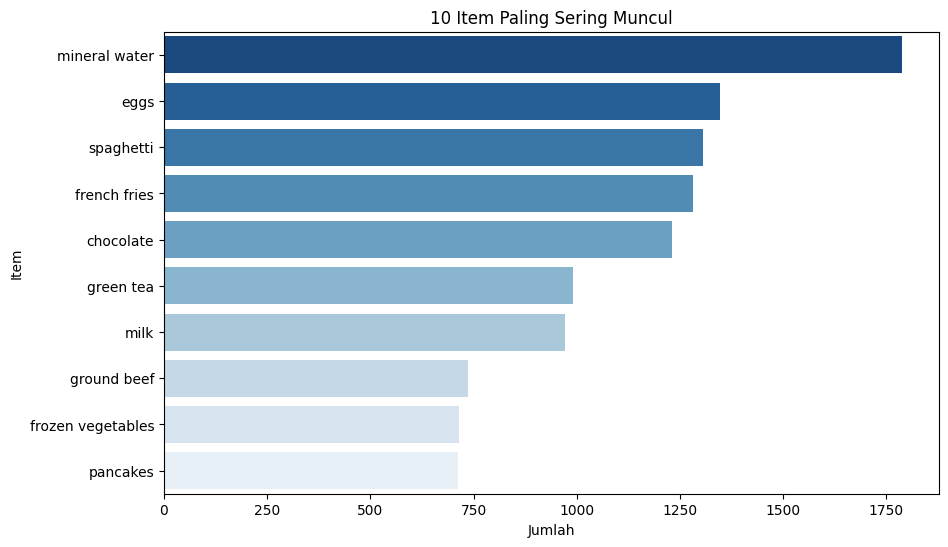

In [ ]:
# Menghitung frekuensi item
from collections import Counter

all_items = [item for sublist in transactions for item in sublist]
item_counter = Counter(all_items)
common_items = item_counter.most_common(10)

# Visualisasi 10 item teratas
items, counts = zip(*common_items)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(items), palette="Blues_r")
plt.title("10 Item Paling Sering Muncul")
plt.xlabel("Jumlah")
plt.ylabel("Item")
plt.show()

**Kesimpulan: Model Apriori**

Model Apriori bekerja dengan mencari kombinasi item yang sering muncul bersama dalam transaksi, kemudian membentuk aturan asosiasi (association rules) berdasarkan support, confidence, dan lift.

**Hasil Utama:**
Kombinasi item seperti 'eggs' dan 'mineral water' muncul cukup sering.

Aturan seperti:

- Jika membeli "mineral water", maka kemungkinan juga membeli "eggs"

- Aturan yang dihasilkan memiliki nilai confidence tinggi (misalnya di atas 0.7) dan lift > 1, menandakan korelasi yang kuat antara item.

Kelebihan:
- Mudah dipahami
- Cocok untuk menghasilkan rekomendasi sederhana
- Mendukung interpretasi melalui aturan seperti A → B

## Eclat

### 1. Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
dataset = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

# Mengubah data ke dalam format list of lists
transactions = []
for i in range(0, len(dataset)):
    basket = [str(dataset.values[i, j]) for j in range(0, 20) if str(dataset.values[i, j]) != 'nan']
    transactions.append(basket)

# Menampilkan 5 transaksi pertama
transactions[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

### 2. Melatih Model Eclat

In [ ]:
from collections import defaultdict
from itertools import combinations

# Membuat tidsets
item_tidset = defaultdict(set)
for tid, transaction in enumerate(transactions):
    for item in transaction:
        item_tidset[frozenset([item])].add(tid)

# Kombinasi 2-itemset
eclat_results = []
min_support_count = 15  # ~0.002 * 7500

single_items = list(item_tidset.keys())
for i in range(len(single_items)):
    for j in range(i+1, len(single_items)):
        itemset = single_items[i] | single_items[j]
        if len(itemset) == 2:
            tids = item_tidset[single_items[i]].intersection(item_tidset[single_items[j]])
            if len(tids) >= min_support_count:
                eclat_results.append((itemset, len(tids)))

# Tampilkan 10 itemset hasil Eclat
for itemset, count in sorted(eclat_results, key=lambda x: -x[1])[:10]:
    print(f"Itemset: {list(itemset)}, Support Count: {count}")

Itemset: ['mineral water', 'spaghetti'], Support Count: 448
Itemset: ['mineral water', 'chocolate'], Support Count: 395
Itemset: ['eggs', 'mineral water'], Support Count: 382
Itemset: ['milk', 'mineral water'], Support Count: 360
Itemset: ['mineral water', 'ground beef'], Support Count: 307
Itemset: ['chocolate', 'spaghetti'], Support Count: 294
Itemset: ['ground beef', 'spaghetti'], Support Count: 294
Itemset: ['eggs', 'spaghetti'], Support Count: 274
Itemset: ['french fries', 'eggs'], Support Count: 273
Itemset: ['frozen vegetables', 'mineral water'], Support Count: 268


### 3. Visualisasi Hasil Eclat

<ipython-input-9-a278b6069ce5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette="Greens_r")


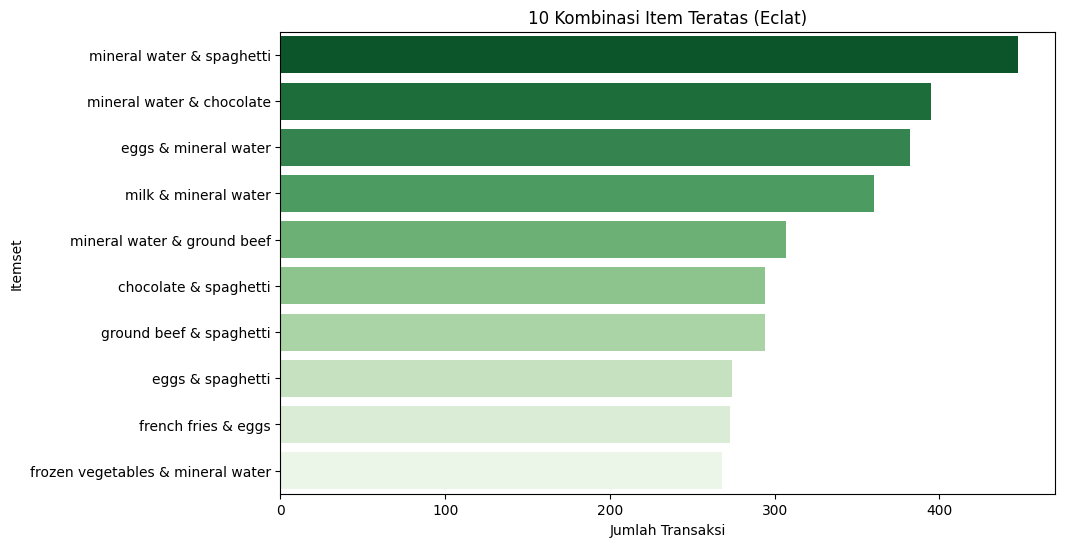

In [ ]:
# Visualisasi itemset eclat teratas
top_itemsets = sorted(eclat_results, key=lambda x: -x[1])[:10]
labels = [' & '.join(list(x[0])) for x in top_itemsets]
counts = [x[1] for x in top_itemsets]

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=labels, palette="Greens_r")
plt.title("10 Kombinasi Item Teratas (Eclat)")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Itemset")
plt.show()

**Kesimpulan: Model Eclat**

Model Eclat fokus pada frekuensi itemset tanpa membentuk aturan asosiasi. Ia menggunakan pendekatan interseksi ID transaksi (TIDSet) untuk menghitung support berbagai kombinasi item.

**Hasil Utama:**
- Ditemukan itemset kombinasi 2 barang dengan support tertinggi, seperti 'mineral water' & 'spaghetti'

- Disajikan dalam bentuk bar chart dari 10 itemset paling sering muncul.

Kelebihan:
- Eksekusi lebih cepat dari Apriori (saat skala besar)
- Lebih cocok untuk analisis itemset frekuen tanpa aturan
- Pendekatan lebih efisien secara memori (TID-set)

